In [3]:
'''
Decision Tree 함수 이용 
중요변수 선택 기준 : Entropy, GINI 
 - GINI : 불확실성을 개선하는 척도 
 - Entropy : 불확실성을 나타내는 척도(작을 수록 불확실성이 낮다.)
    
tree graph 출력 - library install
pip install graphviz
'''
from sklearn.model_selection import train_test_split #split
from sklearn.datasets import load_iris,load_wine
from sklearn.tree import DecisionTreeClassifier#분리 트리:와이가 범주형인경우
from sklearn.tree import DecisionTreeRegressor#회귀트리:와이가 연속형인 겨우
from sklearn.metrics import accuracy_score # 모델 평가
from sklearn.tree.export import export_text, export_graphviz
from sklearn import tree

## iris dataset
iris  =load_iris()
print(iris.feature_names) # 엑스 변수 네임스
x_names = iris.feature_names
dtree = DecisionTreeClassifier(criterion='entropy',
                               random_state=0, 
                               max_depth=2)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
'''
<1차 실습>
criterion='entropy'
max_depth=2
'''    
tree_model = dtree.fit(iris.data, iris.target)
r = export_text(tree_model, feature_names = x_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

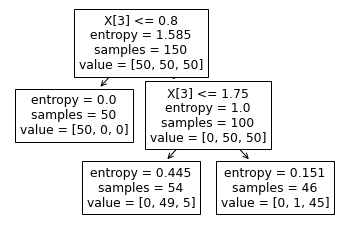

In [5]:
# tree 시각화 
tree.plot_tree(tree_model) 
# x[3] -> 중요변수 
# 1차 : tree depth = 3
# 2차 : tree depth = 2

In [7]:
'''
<2차 실습>
criterion='gini', -> 중요변수 선정 기준(default="gini") 
max_depth=3 -> 트리의 크기 제어 : 과적합 방지 
'''
dtree = DecisionTreeClassifier(criterion='gini',
                               random_state=0, 
                               max_depth=3)
tree_model = dtree.fit(iris.data, iris.target)
r = export_text(tree_model, feature_names = x_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

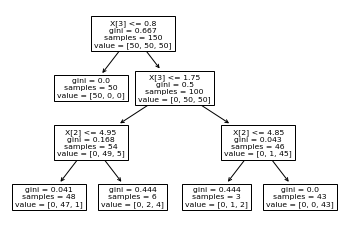

In [8]:
# tree 시각화 
tree.plot_tree(tree_model) 

In [11]:
################################
## wine dataset
################################

wine = load_wine()
#print(wine.DESCR) # dataset 설명 

print(wine.target_names,"\n") # ['class_0' 'class_1' 'class_2']
print(wine.feature_names) # x변수 이름 


['class_0' 'class_1' 'class_2'] 

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [12]:
wine_x = wine.data # 4개 columns 
wine_y = wine.target # Species
print(type(wine_x)) # <class 'numpy.ndarray'>
print(wine_x.shape) # (178, 13) : matrix
print(wine_y.shape) # (178,) : vector

<class 'numpy.ndarray'>
(178, 13)
(178,)


In [14]:
# 5개씩 보기 
print(wine_x[:5,:],"\n")
print(wine_y[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]] 

[0 0 0 0 0]


In [15]:
# 7:3 비율 train/test data set 구성 
x_train,x_test, y_train, y_test = train_test_split(
     wine_x, wine_y, test_size=0.3, random_state=123) # seed값=123 

print(x_train.shape) # (105, 4)
print(x_test.shape) # (45, 4)|

(124, 13)
(54, 13)


In [18]:
# DT 모델 생성 
obj = DecisionTreeClassifier(max_depth=3) # criterion='entropy'

# fit(train_x, train_y)
model = obj.fit(x_train, y_train)

[Text(167.4, 190.26, 'X[12] <= 755.0\ngini = 0.642\nsamples = 124\nvalue = [45, 53, 26]'),
 Text(83.7, 135.9, 'X[11] <= 1.985\ngini = 0.461\nsamples = 75\nvalue = [2, 50, 23]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 0.63\ngini = 0.211\nsamples = 25\nvalue = [0, 3, 22]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 0.745\ngini = 0.114\nsamples = 50\nvalue = [2, 47, 1]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(146.475, 27.180000000000007, 'gini = 0.078\nsamples = 49\nvalue = [2, 47, 0]'),
 Text(251.10000000000002, 135.9, 'X[6] <= 2.165\ngini = 0.222\nsamples = 49\nvalue = [43, 3, 3]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 12.725\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nva

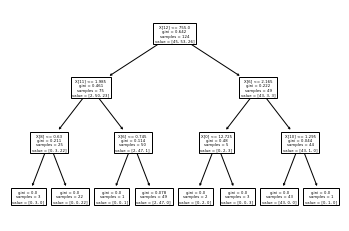

In [19]:
# tree 시각화 
tree.plot_tree(model)

In [20]:
# model 예측치 
pred = model.predict(x_test)

# model 평가 
acc = accuracy_score(y_test, pred)
print('accuracy =', acc)

accuracy = 0.9259259259259259
